In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('Social_Network_Ads.csv')

In [14]:
df.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [16]:
df = df.iloc[:,2:]

In [18]:
df.sample(5)

,Age,EstimatedSalary,Purchased
336,58,144000,1
26,49,28000,1
106,26,35000,0
155,31,15000,0
136,20,82000,0


# Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [315]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased',axis=1),
                                                   df['Purchased'],
                                                   test_size=0.3,
                                                   random_state=0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

# StandardScaler

In [317]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler to the training set, so it learns the parameters
# yaha pe Xi = (Xi - mean)/SD wala formula use ho rha hai
scaler.fit(X_train)

# Transform the training and test sets
# Ham sikhte hai traing data se , par transform dono karte hai
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [319]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [321]:
X_train.head(3)

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000


In [128]:
# X_train_scaled  # ye numpy array hai

In [323]:
# numpy array ek problem tha jise solve karne ke liye maine use dataframe me convert kar diya
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_train.columns)

In [325]:
np.round(X_train.describe(),1)
# yaha original data set ka age(SD) = 10.2 , age(mean) = 37.9 aur Estimatedsalary(SD) = 3464 ,Estimatedsalary(mean) = 69807.1

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [327]:
np.round(X_train_scaled.describe(),1)
# yaha dono ka SD = 1 hai aur mean = 0 hai

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of Scaling

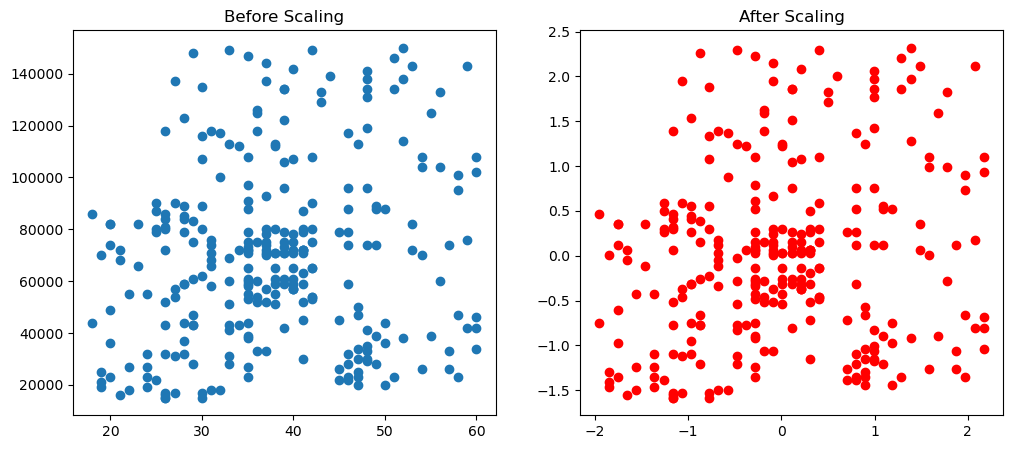

In [349]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

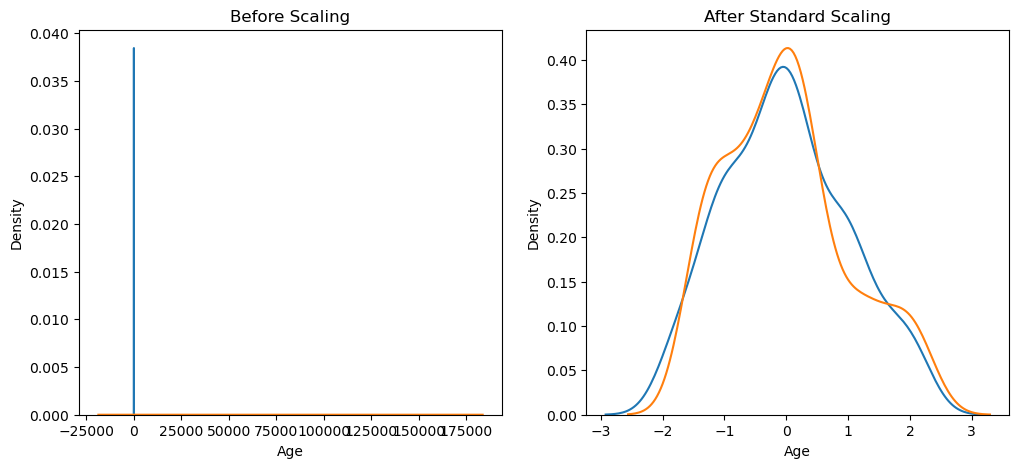

In [351]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# Before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

# after scaling
ax2.set_title("After Standard Scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

# Comparison of Distributions

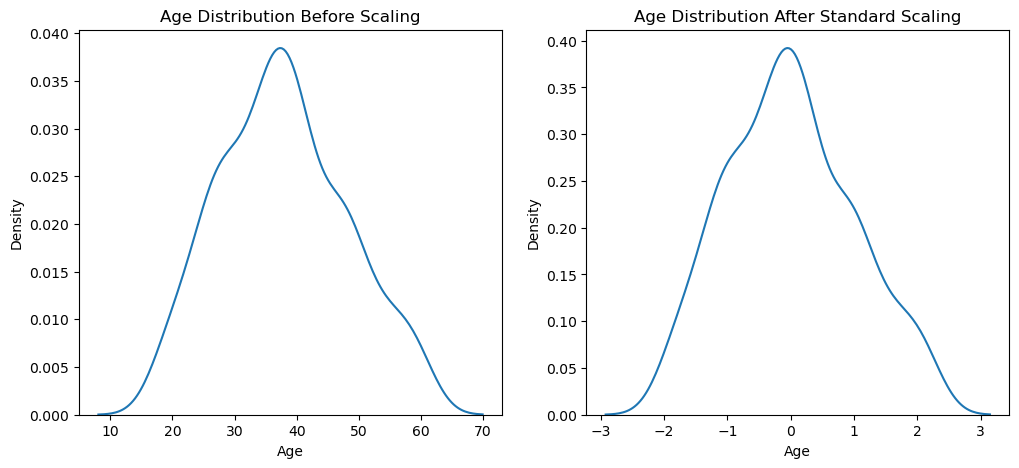

In [331]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# Before scaling
ax1.set_title("Age Distribution Before Scaling")
sns.kdeplot(X_train['Age'],ax=ax1)

# after scaling
ax2.set_title("Age Distribution After Standard Scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
plt.show()

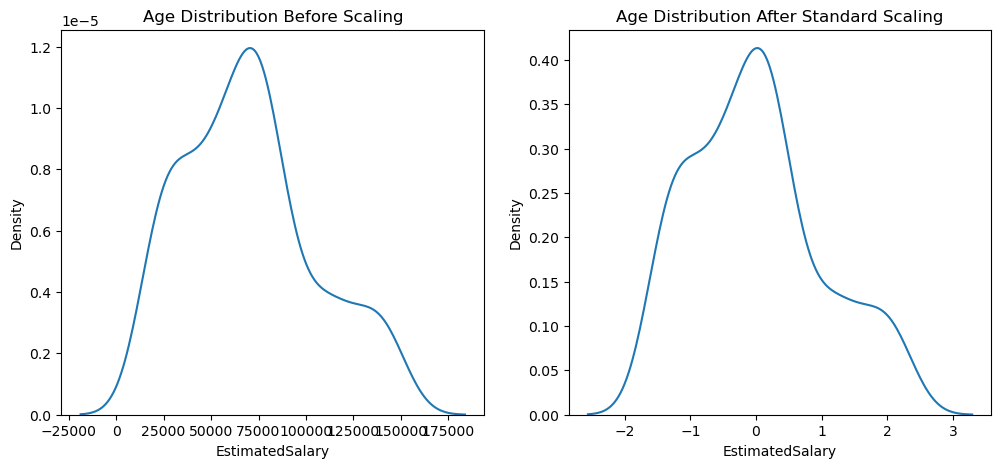

In [353]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# Before scaling
ax1.set_title("Age Distribution Before Scaling")
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

# after scaling
ax2.set_title("Age Distribution After Standard Scaling")
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

# Why scaling is important? 

In [333]:
from sklearn.linear_model import LogisticRegression
# es algorithm me scale kar ke value ko 
# dena jaruri hai nhi to result ache nhi aata hai

In [397]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [399]:
lr.fit(X_train,y_train)# Train on unscaled value
lr_scaled.fit(X_train_scaled,y_train)# Train on scaled value

LogisticRegression()

In [401]:
print(type(X_train), X_train.shape)  
print(type(X_train_scaled), X_train_scaled.shape) 

<class 'pandas.core.frame.DataFrame'> (280, 2)
<class 'numpy.ndarray'> (280, 2)


In [403]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [405]:
from sklearn.metrics import accuracy_score

In [407]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


* Your accuracy results:
* ✅ Actual (Unscaled): 87.5%
* ✅ Scaled: 86.67%

* Why is Scaled Accuracy Slightly Lower?
Scaling doesn't always improve accuracy—it mainly helps with gradient-based optimizers and regularization.
Logistic Regression can work well without scaling when the data is already well-distributed.
Your dataset might not have extreme feature variations, so scaling didn't significantly improve performance.
* What Should You Do?
Since the difference is small (~1%), either model is fine.
If you use regularization (L1/L2 penalty), scaling is recommended.
Try other models (e.g., SVM, Neural Networks) that benefit more from scaling.

In [376]:
# Train Logistic Regression on unscaled data
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred)

In [386]:
accuracy_unscaled

0.875

In [411]:
# Train Logistic Regression on scaled data
lr_scaled.fit(X_train_scaled, y_train_scaled)

# Predict on test data
y_pred_scaled = lr_scaled.predict(X_test_scaled)

# Calculate accuracy
accuracy_scaled = accuracy_score(y_test_scaled, y_pred_scaled)

# Print accuracy
print("Scaled Accuracy:", accuracy_scaled)


Scaled Accuracy: 0.8666666666666667


In [447]:
from sklearn.tree import DecisionTreeClassifier

In [449]:
dt_unscaled = DecisionTreeClassifier(random_state=0)
dt_unscaled.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [451]:
# Predict and calculate accuracy (unscaled)
y_pred_dt_unscaled = dt_unscaled.predict(X_test)
accuracy_dt_unscaled = accuracy_score(y_test, y_pred_dt_unscaled)

In [453]:
# Train Decision Tree on scaled data
dt_scaled = DecisionTreeClassifier(random_state=0)
dt_scaled.fit(X_train_scaled, y_train_scaled)

DecisionTreeClassifier(random_state=0)

In [455]:
y_pred_dt_scaled = dt_scaled.predict(X_test_scaled)
accuracy_dt_scaled = accuracy_score(y_test_scaled, y_pred_dt_scaled)

In [457]:
# Print accuracy comparison
print("Decision Tree (Unscaled) Accuracy:", accuracy_dt_unscaled)
print("Decision Tree (Scaled) Accuracy:", accuracy_dt_scaled)

Decision Tree (Unscaled) Accuracy: 0.875
Decision Tree (Scaled) Accuracy: 0.875


* Decision Tree (Unscaled) Accuracy: 0.875
* Decision Tree (Scaled) Accuracy: 0.875
* both are same because inpe scaling ka fark nhi padta hai

In [464]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Effect of Outlier

In [472]:
import pandas as pd

new_data = pd.DataFrame({
    'Age': [5, 90, 95],
    'EstimatedSalary': [1000, 250000, 350000],
    'Purchased': [0, 1, 1]
})

# Correct method using pd.concat()
df = pd.concat([df, new_data], ignore_index=True)

# Print the last few rows to verify
print(df.tail())


     Age  EstimatedSalary  Purchased
398   36            33000          0
399   49            36000          1
400    5             1000          0
401   90           250000          1
402   95           350000          1


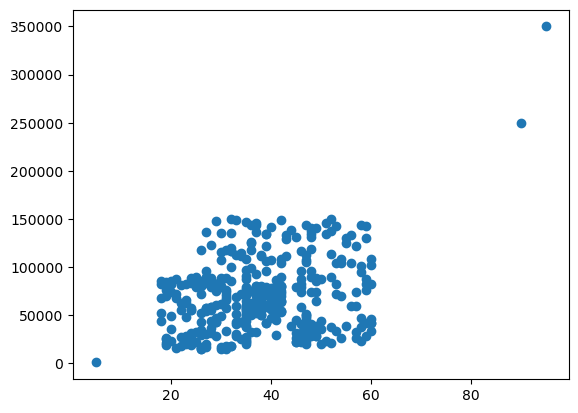

In [474]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [476]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased',axis=1),
                                                   df['Purchased'],
                                                   test_size=0.3,
                                                   random_state=0)
X_train.shape, X_test.shape

((282, 2), (121, 2))

In [478]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler to the training set, so it learns the parameters
# yaha pe Xi = (Xi - mean)/SD wala formula use ho rha hai
scaler.fit(X_train)

# Transform the training and test sets
# Ham sikhte hai traing data se , par transform dono karte hai
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [480]:
# numpy array ek problem tha jise solve karne ke liye maine use dataframe me convert kar diya
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_train.columns)

In [494]:
np.round(X_train.describe(),1)
# yaha original data set ka age(SD) = 10.2 , age(mean) = 37.9 aur Estimatedsalary(SD) = 3464 ,Estimatedsalary(mean) = 69807.1

,Age,EstimatedSalary
count,282.0,282.0
mean,38.1,69138.3
std,11.0,35357.7
min,5.0,1000.0
25%,30.0,43000.0
50%,37.0,68000.0
75%,46.0,86750.0
max,90.0,250000.0


In [490]:
np.round(X_train_scaled.describe(),1)
# yaha dono ka SD = 1 hai aur mean = 0 hai

,Age,EstimatedSalary
count,282.0,282.0
mean,0.0,0.0
std,1.0,1.0
min,-3.0,-1.9
25%,-0.7,-0.7
50%,-0.1,-0.0
75%,0.7,0.5
max,4.7,5.1


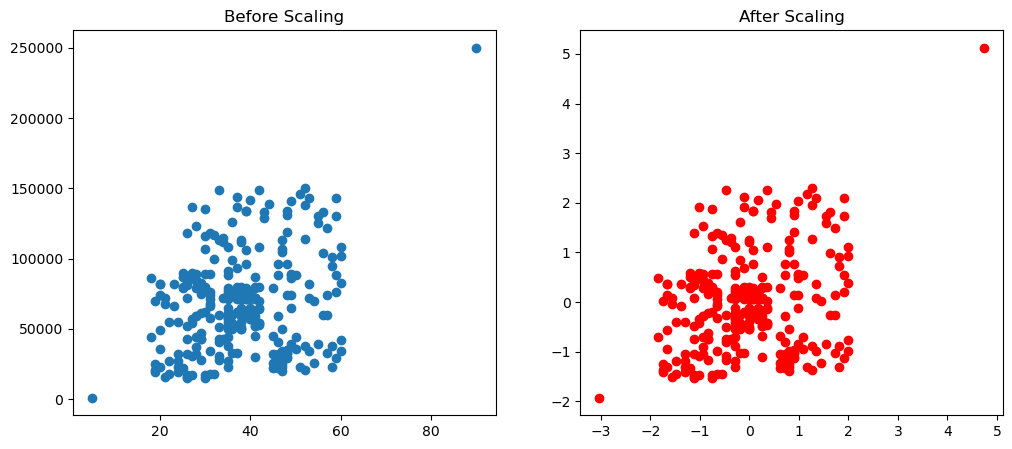

In [486]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

# When to use Standardization

When to Use Standardization:
* K-Means – Uses the Euclidean distance measure, which is sensitive to feature scales.
* K-Nearest Neighbors (KNN) – Measures distances between data points, and different measurement units can affect accuracy.
* Principal Component Analysis (PCA) – Seeks features with maximum variance, which requires standardized data.
* Artificial Neural Networks – Uses Gradient Descent, which works better when features are scaled.
* Gradient Descent – Standardization speeds up theta calculations and ensures a consistent learning rate for paramete